# Recommender 3000 

Dataset info: http://files.grouplens.org/datasets/movielens/ml-20m-README.html. We are using sample dataset http://files.grouplens.org/datasets/movielens/ml-latest-small.zip.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_dir='./ml-latest-small/'

movies = pd.read_csv(data_dir + 'movies.csv', header = 0)
print("Movies count: " + str(movies.shape[0]))
movies.head()

Movies count: 9125


/usr/local/lib/python3.4/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


We can extract year from movie title. Movies without year in title will have value 0. Some "movies" have '-' in title which means they are in fact series.

In [2]:
movies['title'] = movies['title'].apply(lambda x: x.strip())

#if series, e.g. "2007-2013", extract only first year!
movies['Movie_year'] = movies["title"].str.extract("\((\d{4}[-]?\d{0,})\)$", expand=False)
movies.Movie_year = movies.Movie_year.fillna('0')
movies['Movie_year'] = movies['Movie_year'].apply(lambda x: int(x.split('-')[0]))
print(sorted(movies['Movie_year'].unique()))

[0, 1902, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [3]:
movies.head()

,movieId,title,genres,Movie_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [4]:
movies.tail()

,movieId,title,genres,Movie_year
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,2016
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,2016
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,2016
9123,164977,The Gay Desperado (1936),Comedy,1936
9124,164979,"Women of '69, Unboxed",Documentary,0


Distribution of movies by year. Golden years for cinephiles are 1990-.

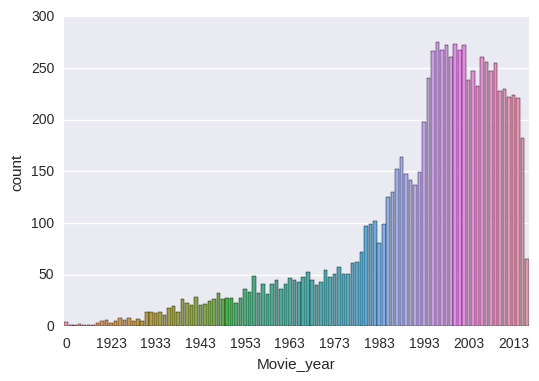

In [5]:
moviesYears = movies.loc[:,"Movie_year"].sort_values().reset_index()
plot = sns.countplot(x = 'Movie_year', data = moviesYears)
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

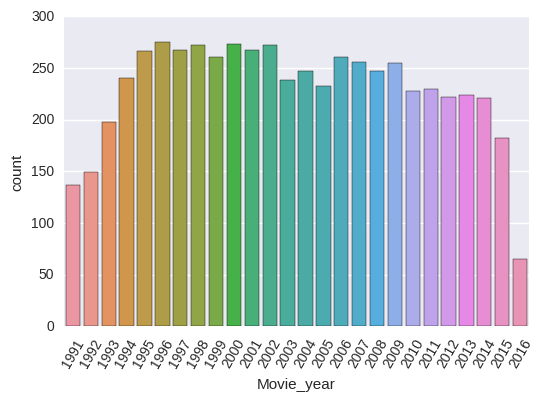

In [6]:
moviesYears = movies.loc[movies["Movie_year"] > 1990,"Movie_year"].sort_values().reset_index()
plot = sns.countplot(x = 'Movie_year', data = moviesYears)
for item in plot.get_xticklabels():
    item.set_rotation(60)

Genre is of 'genre1|genre2|genre3|...' type. We can encode genre as 0-1 columns splitting genres column by '|'.

In [7]:
genres = ["Action","Adventure","Animation","Children","Comedy","Crime","Documentary",
    "Drama","Fantasy","Film-Noir","Horror","IMAX","Musical","Mystery","Romance","Sci-Fi",
    "Thriller","War","Western","(no genres listed)"]

genresCols=[]

for col in genres:
    movies['Genre_' + col] = movies['genres'].apply(lambda x: int(col in x))
    genresCols.append('Genre_' + col)

movies['genresNbr'] = movies['genres'].apply(lambda x: len(x.split('|')))

movies.head()

,movieId,title,genres,Movie_year,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children,Genre_Comedy,Genre_Crime,...,Genre_IMAX,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western,Genre_(no genres listed),genresNbr
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,5
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,3
4,5,Father of the Bride Part II (1995),Comedy,1995,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


Genre distribution:

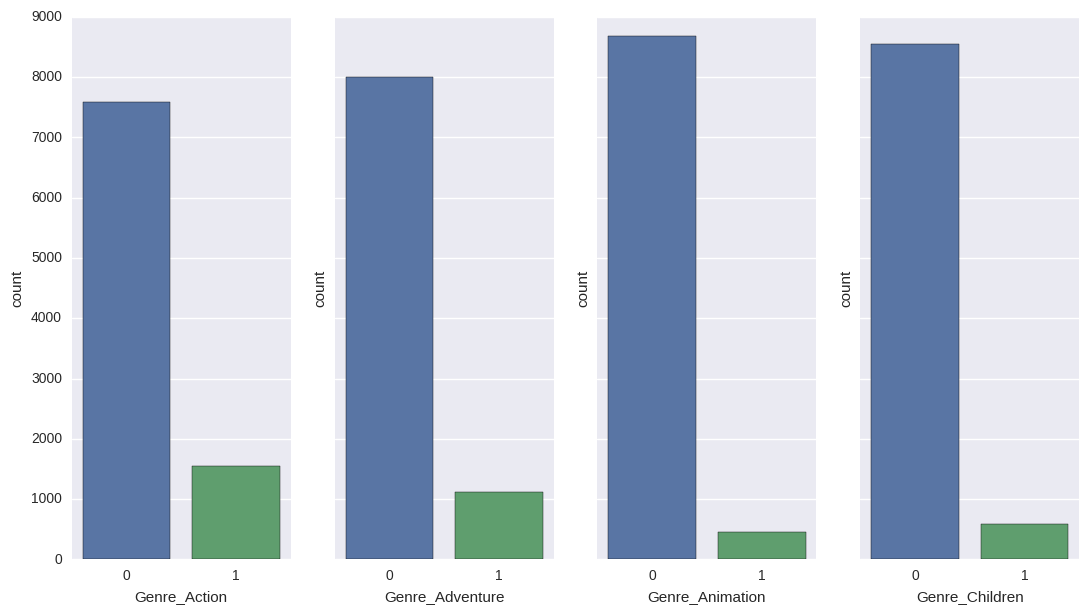

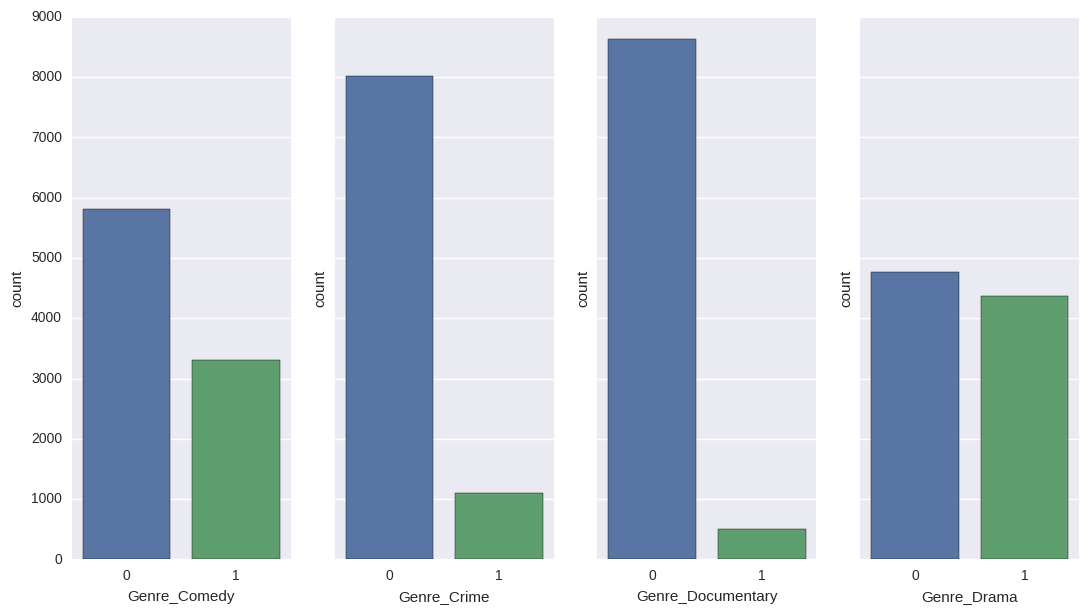

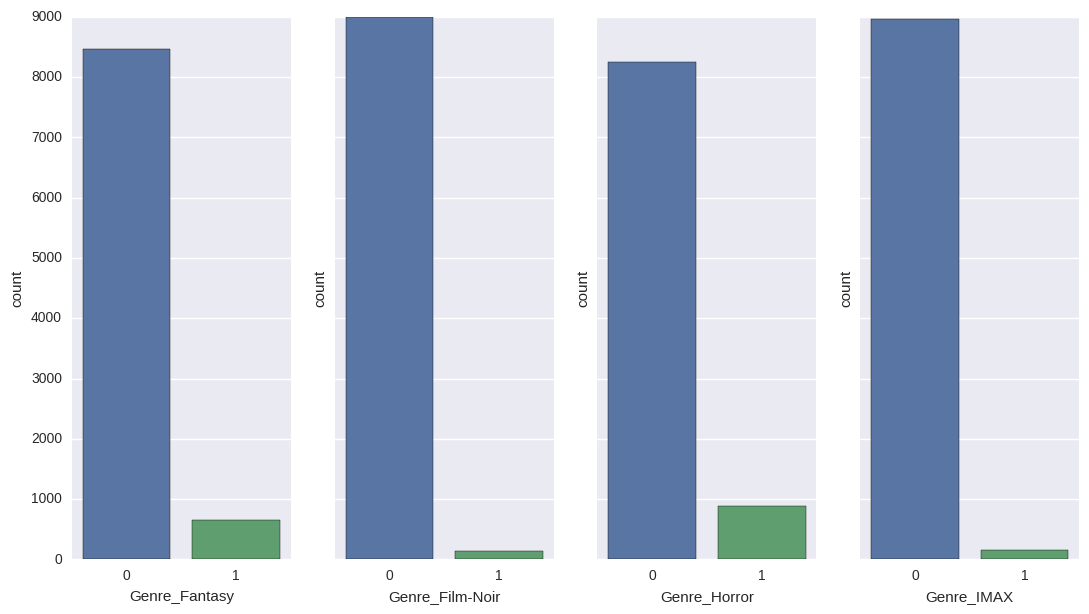

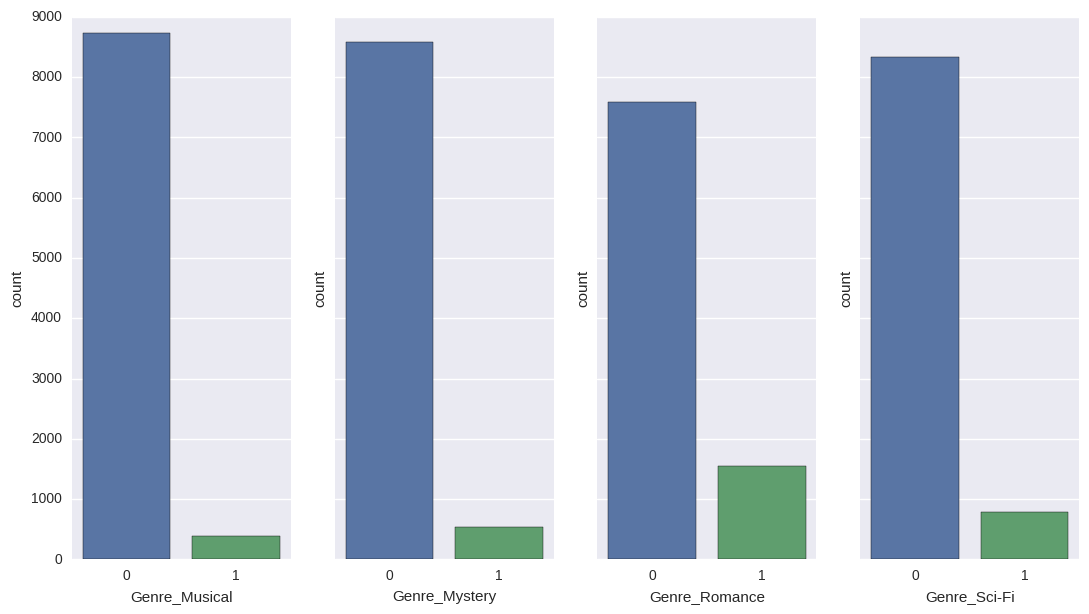

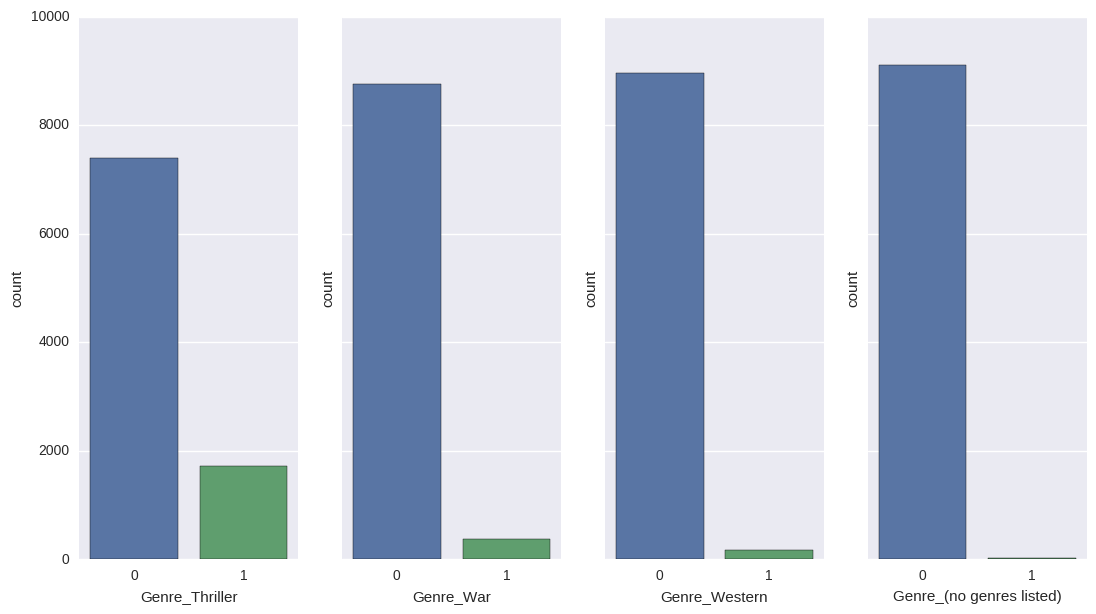

In [8]:
genreDistribution = movies.loc[:,genresCols]

ncol = 4
nrow = 5

for rowIndex in range(nrow):
    f,axList = plt.subplots(nrows = 1, ncols = ncol, figsize = (13, 7), sharey = True)
    features = genresCols[rowIndex*ncol:ncol*(rowIndex+1)]
    
    for axIndex in range(ncol):
        sns.countplot(x = features[axIndex], data = genreDistribution, ax = axList[axIndex])
        axList[axIndex].set(xlabel = features[axIndex])

Let's load ratings dataset. We can see that not all movies have rating. For simplicity they will be later thrown out.

In [9]:
ratings = pd.read_csv(data_dir + 'ratings.csv', header = 0)

print("Ratings count: " + str(ratings.shape[0]))
print("User count: " + str(len(ratings.userId.unique())))
print("Rated movies count: " + str(len(ratings.movieId.unique())))

unratedMovies = list(set(movies.movieId.unique()) - set(ratings.movieId.unique()))

ratedMovies = ratings.movieId.unique()

ratings.head()

Ratings count: 100004
User count: 671
Rated movies count: 9066


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Ratings distribution:

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


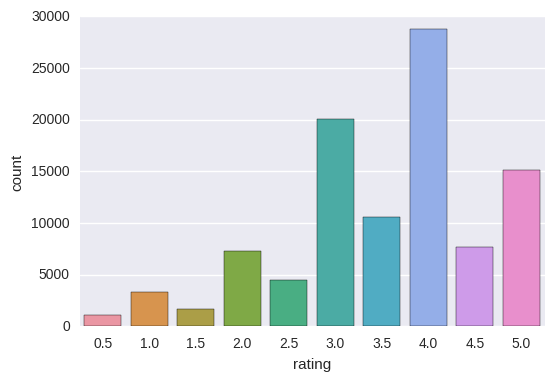

In [10]:
print(ratings["rating"].describe())

movieRatings = ratings.loc[:,"rating"].sort_values().reset_index()
sns.countplot(x = 'rating', data = movieRatings)

Ratings count >= 4 and < 4 is similar, which justifies eventual classification (label ratings >= 4 as 1 and < 4 as 0).

In [11]:
print(len(ratings[ratings["rating"] >= 4]))
print(len(ratings[ratings["rating"] < 4]))

51568
48436


Ratings count per user:

count     671.000000
mean      149.037258
std       231.226948
min        20.000000
25%        37.000000
50%        71.000000
75%       161.000000
max      2391.000000
Name: rating, dtype: float64


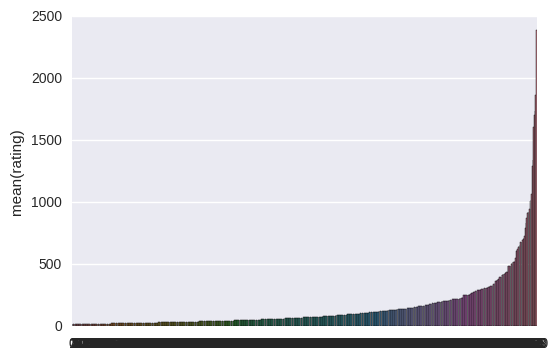

In [12]:
r = ratings.loc[:, ['userId','rating']]
ru = r.groupby('userId').count()
ru = ru.loc[:, "rating"].sort_values().reset_index()
print(ru.loc[:, "rating"].describe())
sns.barplot(ru.index, ru.rating)
del r
del ru

Average rating distribution per user:

count    671.000000
mean       3.657587
std        0.471339
min        1.333333
25%        3.396193
50%        3.675000
75%        3.984026
max        4.948718
Name: rating, dtype: float64


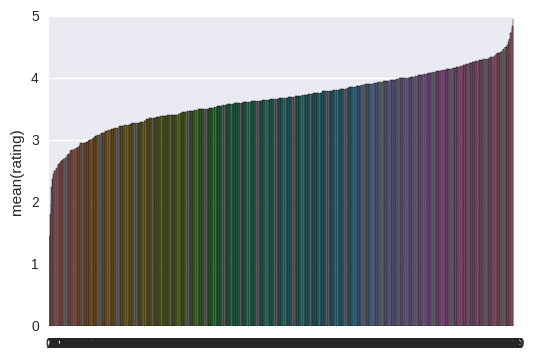

In [13]:
r = ratings.loc[:, ['userId','rating']]
r = r.groupby('userId').mean()
r = r.loc[:, "rating"].sort_values().reset_index()
print(r.loc[:, "rating"].describe())
sns.barplot(r.index, r.rating)
del r

For movies without rating (cold start) we could set median of 3.675. Some users give lower/higher ratings to movies. Ther is user that rated 2391 movie.

There is not much to se in tags dataset so we will not use it in this analysis.

In [14]:
tags = pd.read_csv(data_dir + 'tags.csv', header = 0)

print("Tag count: " + str(tags.shape[0]))
print("User count: " + str(len(tags.userId.unique())))
print("Tagged movies count: " + str(len(tags.movieId.unique())))

tags.head()

Tag count: 1296
User count: 61
Tagged movies count: 689


,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


In [15]:
del tags

Remove movies without rating!

In [16]:
print(movies.shape)
movies = movies[movies["movieId"].isin(ratedMovies)]
moviesIds = movies.movieId
print(movies.shape)

(9125, 25)
(9066, 25)


## Feature engineering 

We will make simple model (Content-based recommender system) by user genre preferences, and use the same as features in xgboost model.

In [17]:
moviesGenres = movies.copy()

#let's keep only 0-1 genres columns
colDrop=[]
for c in moviesGenres.columns:
    if not c.startswith("Genre_"):
        colDrop.append(c)
        
moviesGenres.drop(colDrop, axis = 1, inplace = True)

print(moviesGenres.shape)
print(moviesGenres.head())

user = ratings.drop("timestamp", 1)
user = user.pivot(index = 'userId', columns = 'movieId', values = 'rating')
user = user.fillna(0)
print(user.shape)
user.head()

(9066, 20)
   Genre_Action  Genre_Adventure  Genre_Animation  Genre_Children  \
0             0                1                1               1   
1             0                1                0               1   
2             0                0                0               0   
3             0                0                0               0   
4             0                0                0               0   

   Genre_Comedy  Genre_Crime  Genre_Documentary  Genre_Drama  Genre_Fantasy  \
0             1            0                  0            0              1   
1             0            0                  0            0              1   
2             1            0                  0            0              0   
3             1            0                  0            1              0   
4             1            0                  0            0              0   

   Genre_Film-Noir  Genre_Horror  Genre_IMAX  Genre_Musical  Genre_Mystery  \
0                0   

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
userGenrePreference = np.zeros((20,len(ratings.userId.unique())))
user = user.values
moviesGenresVal = moviesGenres.values
for i in range(user.shape[0]):
    for j in range(moviesGenresVal.shape[1]):
        userGenrePreference[j,i] = np.dot(moviesGenresVal[:,j], user[i,:])

First user genre preferences, looks fine. User 0 prefers Adventure, Drama and Thriller.

In [19]:
def GenrePreferences(usrId):
    print(np.column_stack((moviesGenres.columns, userGenrePreference[:, usrId - 1])))
    ratedMoviesForUser = ratings[ratings["userId"] == usrId]["movieId"]
    print(movies[movies["movieId"].isin(ratedMoviesForUser)][["movieId", "title", "genres"]])

GenrePreferences(1)

[['Genre_Action' 14.0]
 ['Genre_Adventure' 19.5]
 ['Genre_Animation' 6.0]
 ['Genre_Children' 5.0]
 ['Genre_Comedy' 10.0]
 ['Genre_Crime' 5.0]
 ['Genre_Documentary' 0.0]
 ['Genre_Drama' 18.0]
 ['Genre_Fantasy' 8.5]
 ['Genre_Film-Noir' 0.0]
 ['Genre_Horror' 6.0]
 ['Genre_IMAX' 0.0]
 ['Genre_Musical' 3.0]
 ['Genre_Mystery' 0.0]
 ['Genre_Romance' 3.5]
 ['Genre_Sci-Fi' 12.0]
 ['Genre_Thriller' 17.0]
 ['Genre_War' 2.0]
 ['Genre_Western' 3.0]
 ['Genre_(no genres listed)' 0.0]]
      movieId                                           title  \
30         31                          Dangerous Minds (1995)   
833      1029                                    Dumbo (1941)   
859      1061                                 Sleepers (1996)   
906      1129                     Escape from New York (1981)   
931      1172  Cinema Paradiso (Nuovo cinema Paradiso) (1989)   
1017     1263                         Deer Hunter, The (1978)   
1041     1287                                  Ben-Hur (1959)   
1047 

User 331 prefers genres Comedy and Drama.

In [20]:
GenrePreferences(331)

[['Genre_Action' 8.5]
 ['Genre_Adventure' 15.0]
 ['Genre_Animation' 9.0]
 ['Genre_Children' 10.0]
 ['Genre_Comedy' 45.0]
 ['Genre_Crime' 25.0]
 ['Genre_Documentary' 0.0]
 ['Genre_Drama' 43.0]
 ['Genre_Fantasy' 10.0]
 ['Genre_Film-Noir' 0.0]
 ['Genre_Horror' 7.0]
 ['Genre_IMAX' 0.0]
 ['Genre_Musical' 14.0]
 ['Genre_Mystery' 4.0]
 ['Genre_Romance' 8.0]
 ['Genre_Sci-Fi' 17.0]
 ['Genre_Thriller' 12.5]
 ['Genre_War' 4.5]
 ['Genre_Western' 0.0]
 ['Genre_(no genres listed)' 0.0]]
      movieId                                              title  \
23         24                                      Powder (1995)   
154       175                                        Kids (1995)   
173       196                                     Species (1995)   
228       256                                      Junior (1994)   
472       527                            Schindler's List (1993)   
635       762                                  Striptease (1996)   
1567     2005                                G

Movie recommender for 1. user by genre preferences:

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances

def RecommendByGenrePreference(usrId, numBest):
    result2 = userGenrePreference[:, usrId - 1]

    similarity = np.vstack((result2, moviesGenresVal))

    #calculate cosine distance between user and movies:
    similarityResults = cosine_distances(similarity)
    userSimilarityResults = similarityResults[0,:]
    sortedIndex = np.argsort(userSimilarityResults)
    getBest = sortedIndex[:numBest]
    recommendedMoviesIds = moviesIds[getBest]
    recommendedMovies = movies[movies["movieId"].isin(recommendedMoviesIds)][["movieId", "title", "genres"]]
    print(recommendedMovies)
    
RecommendByGenrePreference(1, 10)

      movieId                                              title  \
0           1                                   Toy Story (1995)   
1914     2404                                   Rambo III (1988)   
1939     2430                            Mighty Joe Young (1949)   
5382     8275                                     College (1927)   
6291    40629                           Pride & Prejudice (2005)   
6535    48385  Borat: Cultural Learnings of America for Make ...   
6759    54745                              Rocket Science (2007)   
6867    57038  To the Left of the Father (Lavoura Arcaica) (2...   
7927    90746                   Adventures of Tintin, The (2011)   
8701   115617                                  Big Hero 6 (2014)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1914                Action|Adventure|Thriller|War  
1939                     Adventure|Children|Drama  
5382                                       

Movie recommender for 331. user by genre preferences:

In [22]:
RecommendByGenrePreference(331, 10)

      movieId                                              title  \
0           1                                   Toy Story (1995)   
146       167                               Feast of July (1995)   
643       779                          'Til There Was You (1997)   
2519     3133                                     Go West (1925)   
3937     5087  Get Out Your Handkerchiefs (Préparez vos mouch...   
4405     5963                        Children's Hour, The (1961)   
4443     6040                              Darkness Falls (2003)   
6779    55110                               December Boys (2007)   
8032    93838                        The Raid: Redemption (2011)   
8265   100304                              Liability, The (2012)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
146                                         Drama  
643                                 Drama|Romance  
2519                               Comedy|W

Genre peferences model isn't something but we can use its outputs as features in later modelling.

Let's create statistcal features by user ratings (there are more http://pandas.pydata.org/pandas-docs/stable/basics.html):

In [23]:
f = ['sum','mean','count','median','min','max','std','var']

fUsrRating = ['userId']
ratingsUser = ratings.loc[:, ['userId','rating']]
ratingsUser = ratingsUser.groupby('userId').agg(f).reset_index()
fUsrRating.extend(["UsrRating_" + i for i in f])
ratingsUser.columns = fUsrRating
print(ratingsUser.shape)
print(ratingsUser.head())

fMovRating = ['movieId']
ratingsMovie = ratings.loc[:, ['movieId','rating']]
ratingsMovie = ratingsMovie.groupby('movieId').agg(f).reset_index()
fMovRating.extend(["MovRating_" + i for i in f])
ratingsMovie.columns = fMovRating
print(ratingsMovie.shape)
print(ratingsMovie.head())

(671, 9)
   userId  UsrRating_sum  UsrRating_mean  UsrRating_count  UsrRating_median  \
0       1           51.0        2.550000               20               2.5   
1       2          265.0        3.486842               76               3.0   
2       3          182.0        3.568627               51               3.5   
3       4          887.0        4.348039              204               5.0   
4       5          391.0        3.910000              100               4.0   

   UsrRating_min  UsrRating_max  UsrRating_std  UsrRating_var  
0            1.0            4.0       0.887041       0.786842  
1            1.0            5.0       0.901753       0.813158  
2            2.0            5.0       0.741752       0.550196  
3            1.0            5.0       0.947616       0.897976  
4            1.5            5.0       0.565775       0.320101  
(9066, 9)
   movieId  MovRating_sum  MovRating_mean  MovRating_count  MovRating_median  \
0        1          956.5        3.872470 

Movie year features. I thought maybe the model would pick up year data and learn whether user rates older or newer movies, but it turned out those features aren't good predictors.

In [24]:
"""
f = ['sum','mean','median','min','max','std','var'] #we already have count!

fUsrMovieYears = ['userId']

usrMovieYears = ratings.loc[:, ['userId','movieId']]
mov = movies.loc[:, ['movieId','Movie_year']]
usrMovieYears = usrMovieYears.merge(mov, left_on = 'movieId', right_on = 'movieId', how = 'inner')
usrMovieYears = usrMovieYears.loc[:, ['userId','Movie_year']]

#throw out movies without year!
usrMovieYears=usrMovieYears[usrMovieYears["Movie_year"] != 0]

usrMovieYears = usrMovieYears.groupby('userId').agg(f).reset_index()
fUsrMovieYears.extend(["UsrMovieYears_" + i for i in f])
usrMovieYears.columns = fUsrMovieYears
print(usrMovieYears.shape)
print(usrMovieYears.head())
"""

'\nf = [\'sum\',\'mean\',\'median\',\'min\',\'max\',\'std\',\'var\'] #we already have count!\n\nfUsrMovieYears = [\'userId\']\n\nusrMovieYears = ratings.loc[:, [\'userId\',\'movieId\']]\nmov = movies.loc[:, [\'movieId\',\'Movie_year\']]\nusrMovieYears = usrMovieYears.merge(mov, left_on = \'movieId\', right_on = \'movieId\', how = \'inner\')\nusrMovieYears = usrMovieYears.loc[:, [\'userId\',\'Movie_year\']]\n\n#throw out movies without year!\nusrMovieYears=usrMovieYears[usrMovieYears["Movie_year"] != 0]\n\nusrMovieYears = usrMovieYears.groupby(\'userId\').agg(f).reset_index()\nfUsrMovieYears.extend(["UsrMovieYears_" + i for i in f])\nusrMovieYears.columns = fUsrMovieYears\nprint(usrMovieYears.shape)\nprint(usrMovieYears.head())\n'

Let's create specific user statistical features:

In [25]:
f = ['sum','mean','count','median','min','max','std','var']

ratingsTemp = movies.copy()
ratingsTemp.drop(["genres","Movie_year"], inplace = True, axis = 1)
ratingsTemp = ratingsTemp.merge(ratings, left_on = 'movieId', right_on = 'movieId', how = 'inner')

for col in genresCols:
    ratingsTempT = ratingsTemp[ratingsTemp[col] == 1]
    ratingsTempT = ratingsTempT.loc[:,['userId', 'rating']]
    ratingsTempT = ratingsTempT.groupby(['userId'], as_index = False).agg(f).reset_index()
    if col == "Genre_Action":
        ratingsTempT.columns = ['userId'] + ["Rating" + col + '_' + i for i in f]
        ratingsUserGenre = ratingsTempT
    else:
        ratingsTempT.drop(["userId"], inplace = True, axis = 1)
        ratingsTempT.columns = ["Rating" + col + '_' + i for i in f]
        ratingsUserGenre = pd.concat([ratingsUserGenre, ratingsTempT], axis = 1, join_axes = [ratingsUserGenre.index])

ratingsUserGenre = ratingsUserGenre.fillna(0)
print(ratingsUserGenre.columns)
print(ratingsUserGenre.shape)
print(ratingsUserGenre.head())

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:15: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.


Index(['userId', 'RatingGenre_Action_sum', 'RatingGenre_Action_mean',
       'RatingGenre_Action_count', 'RatingGenre_Action_median',
       'RatingGenre_Action_min', 'RatingGenre_Action_max',
       'RatingGenre_Action_std', 'RatingGenre_Action_var',
       'RatingGenre_Adventure_sum',
       ...
       'RatingGenre_Western_std', 'RatingGenre_Western_var',
       'RatingGenre_(no genres listed)_sum',
       'RatingGenre_(no genres listed)_mean',
       'RatingGenre_(no genres listed)_count',
       'RatingGenre_(no genres listed)_median',
       'RatingGenre_(no genres listed)_min',
       'RatingGenre_(no genres listed)_max',
       'RatingGenre_(no genres listed)_std',
       'RatingGenre_(no genres listed)_var'],
      dtype='object', length=161)
(671, 161)
   userId  RatingGenre_Action_sum  RatingGenre_Action_mean  \
0       1                    14.0                 2.800000   
1       2                    63.0                 3.315789   
2       3                    55.5         

Our prediction dataset looks like:

In [26]:
trainX = movies.copy()
trainX = trainX.merge(ratings, left_on = 'movieId', right_on = 'movieId', how = 'inner')
trainX = trainX.merge(ratingsUser, left_on = 'userId', right_on = 'userId', how = 'left')
trainX = trainX.merge(ratingsMovie, left_on = 'movieId', right_on = 'movieId', how = 'left')
trainX = trainX.merge(ratingsUserGenre, left_on = 'userId', right_on = 'userId', how = 'left')

genresPrefCols = ["Usr" + s + "_pref" for s in genresCols]
userGenrePreferencePd = pd.DataFrame(index = range(len(userGenrePreference.T)), 
   columns = genresPrefCols, data = userGenrePreference.T)

trainX = pd.concat([trainX, userGenrePreferencePd], axis = 1, join_axes = [trainX.index])
#NA's appeared!
trainX = trainX.fillna(0)

trainX.drop(["title","genres","timestamp","movieId","userId"], inplace = True, axis = 1)

print(trainX.shape)
print(trainX.columns)
print(trainX.head())

(100004, 219)
Index(['Movie_year', 'Genre_Action', 'Genre_Adventure', 'Genre_Animation',
       'Genre_Children', 'Genre_Comedy', 'Genre_Crime', 'Genre_Documentary',
       'Genre_Drama', 'Genre_Fantasy',
       ...
       'UsrGenre_Horror_pref', 'UsrGenre_IMAX_pref', 'UsrGenre_Musical_pref',
       'UsrGenre_Mystery_pref', 'UsrGenre_Romance_pref',
       'UsrGenre_Sci-Fi_pref', 'UsrGenre_Thriller_pref', 'UsrGenre_War_pref',
       'UsrGenre_Western_pref', 'UsrGenre_(no genres listed)_pref'],
      dtype='object', length=219)
   Movie_year  Genre_Action  Genre_Adventure  Genre_Animation  Genre_Children  \
0        1995             0                1                1               1   
1        1995             0                1                1               1   
2        1995             0                1                1               1   
3        1995             0                1                1               1   
4        1995             0                1                1  

## Training and evaluation

We will create regression predicting user ratings. Testing on 20% holdout dataset. Most accurate evaluation would be to take (for example) 20% rated movies of every user for holdout.
Of course, we use xgboost.

In [27]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.feature_selection as fs
from math import sqrt

train = trainX.copy()
y = train["rating"].values
train.drop(["rating"], inplace = True, axis = 1)
train = train.values

kBest = 150
selectKBest = fs.SelectKBest(fs.f_regression, k = kBest)
selectKBest.fit(train, y)
train = train[:, selectKBest.get_support()]

testSize = 0.2
seed = 123

tr_id, te_id = train_test_split(range(len(y)), test_size = testSize, random_state = seed)

tr = train[tr_id]
te = train[te_id]
tr_l = y[tr_id]
te_l = y[te_id]

import xgboost as xgb

num_round = 100
param = {}
param['objective'] = 'reg:linear'
param['eta'] = 0.06
param['max_depth'] = 20
param['eval_metric'] = 'rmse'
param['silent'] = 1
param['subsample'] = 0.9

xgtrain = xgb.DMatrix(tr, label=tr_l)
xgtest = xgb.DMatrix(te)
model = xgb.train(param, xgtrain, num_round)
preds = model.predict(xgtest)

#preds[preds<0.5] = 0.5
#preds[preds>5] = 5
rms = sqrt(mean_squared_error(te_l, preds))
print(rms)
#0.8119430296402993

0.8119430296402993


Train the model again but on whole dataset for later prediction.

In [28]:
xgtrain = xgb.DMatrix(train, label = y)
model = xgb.train(param, xgtrain, num_round)

## Testing

Firstly, for every user we have to find movies he didn't rate. Movies count is 9066. If per user we take all movies he didn't rate we would get very very big dataset for prediction. We can reduce it by removing genres user doesn't prefer. 

In [29]:
#we look (u,m) pairs u being user and m movie user did not rate
userIds = ratings.userId.unique()
for usrId in userIds:
    #ad-hoc
    minGenrePreference = np.median(userGenrePreference[:, usrId - 1])
    userUnfavoredGenres = [g for i, g in enumerate(genresCols) if userGenrePreference[i, usrId - 1] <= minGenrePreference]
    moviesPreferred = movies.copy()
    for g in userUnfavoredGenres:
        moviesPreferred = moviesPreferred[moviesPreferred[g] != 1]
    userUnratedMovies = list(set(moviesPreferred.movieId.values) - set(ratings[ratings["userId"] == usrId]["movieId"]))
    userUnratedMovies = np.asarray(userUnratedMovies)

    u = [usrId] * len(userUnratedMovies)
    u = np.asarray(u)

    if usrId == 1:
        usermovie = np.vstack((u, userUnratedMovies)).T
        usermovies = usermovie
    else:
        usermovie=np.vstack((u,userUnratedMovies)).T
        usermovies=np.vstack((usermovies,usermovie))

testX = pd.DataFrame(index = range(len(usermovies)), columns = ["userId","movieId"], data = usermovies)
testX = testX.merge(movies, left_on = 'movieId', right_on = 'movieId', how = 'inner')
testX = testX.merge(ratingsUser, left_on = 'userId', right_on = 'userId', how = 'left')
testX = testX.merge(ratingsMovie, left_on = 'movieId', right_on = 'movieId', how = 'left')
testX = testX.merge(ratingsUserGenre, left_on = 'userId', right_on = 'userId', how = 'left')

testUserIds = testX.userId

genrePreferencesUser = pd.DataFrame(index = range(testX.shape[0]), columns = genresPrefCols, 
    data = [userGenrePreferencePd.loc[usrId - 1, :].values] * testX.shape[0])
testX = pd.concat([testX, genrePreferencesUser], axis = 1, join_axes = [testX.index])
testX = testX.fillna(0)

testXMovieIds = testX.movieId

testX.drop(["title","genres","movieId","userId"], inplace=True, axis=1)

print(testX.shape)
print(testX.columns)
print(testX.head())

(3733838, 218)
Index(['Movie_year', 'Genre_Action', 'Genre_Adventure', 'Genre_Animation',
       'Genre_Children', 'Genre_Comedy', 'Genre_Crime', 'Genre_Documentary',
       'Genre_Drama', 'Genre_Fantasy',
       ...
       'UsrGenre_Horror_pref', 'UsrGenre_IMAX_pref', 'UsrGenre_Musical_pref',
       'UsrGenre_Mystery_pref', 'UsrGenre_Romance_pref',
       'UsrGenre_Sci-Fi_pref', 'UsrGenre_Thriller_pref', 'UsrGenre_War_pref',
       'UsrGenre_Western_pref', 'UsrGenre_(no genres listed)_pref'],
      dtype='object', length=218)
   Movie_year  Genre_Action  Genre_Adventure  Genre_Animation  Genre_Children  \
0        1995             0                0                0               0   
1        1995             0                0                0               0   
2        1995             0                0                0               0   
3        1995             0                0                0               0   
4        1995             0                0                0 

Prediction:

In [30]:
xgtest = testX.values
xgtest = xgtest[:, selectKBest.get_support()]
xgtest = xgb.DMatrix(xgtest)
preds = model.predict(xgtest)

First n recommended movies for user:

In [31]:
def RecommendMovies(userId, bestN):
    userIdx = testUserIds[testUserIds == userId].index
    userPreds = preds[userIdx]
    sortIndex = np.argsort(userPreds)[::-1][:len(userPreds)]
    userIdxSortedBest = userIdx[sortIndex]
    best = testXMovieIds.loc[userIdxSortedBest]
    recommendedMovies = movies[movies["movieId"].isin(list(best)[:bestN])][["movieId","title","genres"]]
    print(recommendedMovies)

Genre preferences and rated movies for 1. user / recommended movies

In [32]:
GenrePreferences(1)
RecommendMovies(1, 10)

[['Genre_Action' 14.0]
 ['Genre_Adventure' 19.5]
 ['Genre_Animation' 6.0]
 ['Genre_Children' 5.0]
 ['Genre_Comedy' 10.0]
 ['Genre_Crime' 5.0]
 ['Genre_Documentary' 0.0]
 ['Genre_Drama' 18.0]
 ['Genre_Fantasy' 8.5]
 ['Genre_Film-Noir' 0.0]
 ['Genre_Horror' 6.0]
 ['Genre_IMAX' 0.0]
 ['Genre_Musical' 3.0]
 ['Genre_Mystery' 0.0]
 ['Genre_Romance' 3.5]
 ['Genre_Sci-Fi' 12.0]
 ['Genre_Thriller' 17.0]
 ['Genre_War' 2.0]
 ['Genre_Western' 3.0]
 ['Genre_(no genres listed)' 0.0]]
      movieId                                           title  \
30         31                          Dangerous Minds (1995)   
833      1029                                    Dumbo (1941)   
859      1061                                 Sleepers (1996)   
906      1129                     Escape from New York (1981)   
931      1172  Cinema Paradiso (Nuovo cinema Paradiso) (1989)   
1017     1263                         Deer Hunter, The (1978)   
1041     1287                                  Ben-Hur (1959)   
1047 

Genre preferences and rated movies for 2. user / recommended movies

In [33]:
GenrePreferences(2)
RecommendMovies(2, 10)

[['Genre_Action' 63.0]
 ['Genre_Adventure' 45.0]
 ['Genre_Animation' 22.0]
 ['Genre_Children' 28.0]
 ['Genre_Comedy' 99.0]
 ['Genre_Crime' 33.0]
 ['Genre_Documentary' 0.0]
 ['Genre_Drama' 141.0]
 ['Genre_Fantasy' 34.0]
 ['Genre_Film-Noir' 0.0]
 ['Genre_Horror' 14.0]
 ['Genre_IMAX' 8.0]
 ['Genre_Musical' 15.0]
 ['Genre_Mystery' 16.0]
 ['Genre_Romance' 79.0]
 ['Genre_Sci-Fi' 19.0]
 ['Genre_Thriller' 70.0]
 ['Genre_War' 19.0]
 ['Genre_Western' 10.0]
 ['Genre_(no genres listed)' 0.0]]
     movieId                                              title  \
9         10                                   GoldenEye (1995)   
16        17                       Sense and Sensibility (1995)   
37        39                                    Clueless (1995)   
45        47                        Seven (a.k.a. Se7en) (1995)   
48        50                         Usual Suspects, The (1995)   
49        52                            Mighty Aphrodite (1995)   
58        62                          Mr. Hol

Genre preferences and rated movies for 444. user / recommended movies

In [34]:
GenrePreferences(444)
RecommendMovies(444, 10)

[['Genre_Action' 5.0]
 ['Genre_Adventure' 8.0]
 ['Genre_Animation' 1.0]
 ['Genre_Children' 2.0]
 ['Genre_Comedy' 12.0]
 ['Genre_Crime' 4.0]
 ['Genre_Documentary' 0.0]
 ['Genre_Drama' 39.0]
 ['Genre_Fantasy' 3.0]
 ['Genre_Film-Noir' 4.0]
 ['Genre_Horror' 3.0]
 ['Genre_IMAX' 0.0]
 ['Genre_Musical' 7.0]
 ['Genre_Mystery' 7.0]
 ['Genre_Romance' 8.0]
 ['Genre_Sci-Fi' 0.0]
 ['Genre_Thriller' 14.0]
 ['Genre_War' 4.0]
 ['Genre_Western' 0.0]
 ['Genre_(no genres listed)' 0.0]]
      movieId                                              title  \
723       902                      Breakfast at Tiffany's (1961)   
951      1193             One Flew Over the Cuckoo's Nest (1975)   
1288     1617                           L.A. Confidential (1997)   
1691     2133                   Adventures in Babysitting (1987)   
2098     2622  William Shakespeare's A Midsummer Night's Drea...   
2553     3176                    Talented Mr. Ripley, The (1999)   
3113     3897                               Almost F

### Other

TODO: 

Features:
    - Tag features
    - Genome features
    - Kmeans features
    + User genre preferences
    - User genre preferences - sum!
    + Movies: genre count
    - User genre preferences, 1 if genre rating >=4, -1 if <4, 0 else
    + User stat years features - count, mean, quantile, kurtosis, skewness, … - not good predictors!
    + User Stat rating features - count, mean, quantile, kurtosis, skewness, …
    + Movie Stat rating features - count, mean, quantile, kurtosis, skewness, …
    - Movie type stat rating features - count, mean, quantile, kurtosis, skewness, …
    + Movies user rated type stat rating features - count, mean, quantile, kurtosis, skewness, …
    - Cosine similarity movie-user like xgboost input, similar to genre preferences
    - Data from IMDB
    - Tfidf - https://www.analyticsvidhya.com/blog/2015/08/beginners-guide-learn-content-based-recommender-systems/
    - Tfidf for movies names, tags, genome dataset
Evaluation/modelling:
    - Map all movies rated >=4 as 1 and <4 as 0 and do classification instead of regression
    - CV instead of holdout
    - Instead of random holdout take 20% (newset) ratings of every user as holdout
    + Feature selection (SelectKBest, ...)
Test dataset :
    - Reduce test dataset differently
Model:
    - Other models - rf, knn, nn, lm, FM!, ...
    - Cold start - unrated movie or new movie or new user (cosine distance)
